In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [7]:
df.describe(include=object)

,question1,question2
count,404289,404288
unique,290456,299174
top,How do I improve my English speaking?,How can you look at someone's private Instagra...
freq,50,120


In [8]:
df.isnull().sum()/df.shape[0]*100

id              0.000000
qid1            0.000000
qid2            0.000000
question1       0.000247
question2       0.000495
is_duplicate    0.000000
dtype: float64

In [9]:
df=df.sample(40000,random_state=2)

In [10]:
df.duplicated().sum()

0


        0 - Not Duplicate
        1 - Duplicate

0    25278
1    14722
Name: is_duplicate, dtype: int64
---------------------------
0    63.195
1    36.805
Name: is_duplicate, dtype: float64
---------------------------


<AxesSubplot:>

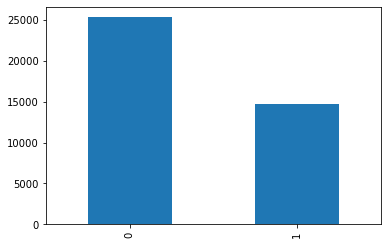

In [11]:
print('''
        0 - Not Duplicate
        1 - Duplicate
''')



print(df['is_duplicate'].value_counts())
print("---------------------------")
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)
print("---------------------------")
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# Combine all questions
rep = pd.Series(df['question1'].tolist() + df['question2'].tolist())

# Drop NaNs and convert to string
rep = rep.dropna().astype(str)

# Count frequency of each question
question_counts = rep.value_counts()

# Find repeated questions (frequency > 1)
repeated = question_counts[question_counts > 1]

print("Total unique questions:", question_counts.shape[0])
print("Number of questions that are repeated:", repeated.shape[0])


Total unique questions: 72372
Number of questions that are repeated: 5319


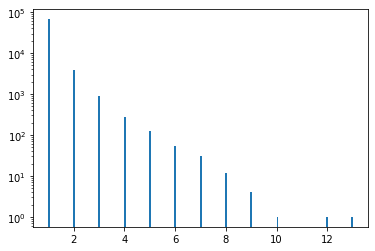

In [13]:
# repeated word plot
plt.hist(rep.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [14]:
# Text Preprocessing

In [15]:
import re
from bs4 import BeautifulSoup

In [16]:
import re
from bs4 import BeautifulSoup

def preprocess(q):
    # Convert to lowercase and strip leading/trailing whitespace
    q = str(q).lower().strip()
    
    # Replace special characters with their textual equivalents
    q = q.replace('$', ' dollar ')
    q = q.replace('%', ' percent ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # Remove [math] tags
    q = q.replace('[math]', '')

    # Replace numeric shorthand
    q = q.replace(',000,000,000', 'b')
    q = q.replace(',000,000', 'm')
    q = q.replace(',000', 'k')
    q = re.sub(r'(\d+)000000000', r'\1b', q)
    q = re.sub(r'(\d+)000000', r'\1m', q)
    q = re.sub(r'(\d+)000', r'\1k', q)

    # Decontract and normalize chat acronyms
    contractions = {
        "ain't": "am not", "aren't": "are not", "can't": "can not", "can't've": "can not have",
        "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
        "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
        "hasn't": "has not", "haven't": "have not", "he's": "he is", "i'm": "i am",
        "i've": "i have", "isn't": "is not", "it's": "it is", "let's": "let us",
        "she's": "she is", "that's": "that is", "there's": "there is", "they're": "they are",
        "wasn't": "was not", "we're": "we are", "weren't": "were not", "what's": "what is",
        "where's": "where is", "who's": "who is", "won't": "will not", "wouldn't": "would not",
        "you're": "you are", "you've": "you have", "brb": "be right back", "lol": "laughing out loud",
        "omg": "oh my god", "ttyl": "talk to you later", "idk": "i do not know", "imo": "in my opinion",
        "btw": "by the way", "b4": "before", "u": "you", "ur": "your", "r": "are", "k": "okay",
        "thx": "thanks", "ty": "thank you", "np": "no problem", "wtf": "what the heck",
        "tbh": "to be honest", "nvm": "never mind", "fyi": "for your information",
        "gr8": "great", "bday": "birthday", "bc": "because", "plz": "please", "asap": "as soon as possible"
    }

    q_words = []
    for word in q.split():
        if word in contractions:
            q_words.append(contractions[word])
        else:
            q_words.append(word)
    q = ' '.join(q_words)

    # Remove HTML tags
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove all non-word characters (punctuation etc.)
    q = re.sub(r'\W+', ' ', q)

    # Final trim
    return q.strip()


In [17]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [18]:
preprocess("I've been working! on this but it wasn't <b>done</b>")

'i have been working on this but it was not done'

In [19]:
df

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0
...,...,...,...,...,...,...
17655,17655,33513,33514,how do i become like balaji vishwanathan,what does it take to be like balaji vishwanathan,1
400301,400301,533655,533656,why do my balls itch,why do my feet itch during sleep,0
27519,27519,51119,5241,what is the best way to learn and be fluent in...,how do i quickly and efficiently learn a new l...,0
142783,142783,92967,216394,did narendra modi insult the national flag by ...,what is it like working with pm narendra modi,0


In [20]:
#Feature Engineering 

In [21]:
#THESE ARE THE FEATURE WE ARE TARGETTING TO CREATE

In [22]:
# 1. Length of features (character count)

df['q1_len'] = df['question1'].astype(str).str.len()
df['q2_len'] = df['question2'].astype(str).str.len()


In [23]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49


In [24]:
# 2. no of words in Questions

df['q1_words']= df['question1'].apply(lambda r: len(r.split(" ")))
df['q2_words']= df['question2'].apply(lambda r: len(r.split(" ")))

In [25]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [26]:
# 3. commom words in both sentence
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [27]:
df['common_words']=df.apply(common_words,axis=1)

In [28]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3
...,...,...,...,...,...,...,...,...,...,...,...
17655,17655,33513,33514,how do i become like balaji vishwanathan,what does it take to be like balaji vishwanathan,1,40,48,7,9,3
400301,400301,533655,533656,why do my balls itch,why do my feet itch during sleep,0,20,32,5,7,4
27519,27519,51119,5241,what is the best way to learn and be fluent in...,how do i quickly and efficiently learn a new l...,0,57,53,13,10,4
142783,142783,92967,216394,did narendra modi insult the national flag by ...,what is it like working with pm narendra modi,0,103,45,20,9,3


In [29]:
#4 total words in both feature
def total_words(row):
    q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(q1) + len(q2)


In [30]:
df['total_words']= df.apply(total_words, axis=1)

In [31]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [32]:
# 5 word sharing 
df['word_sharing']= round(df['common_words']/df['total_words'],2)

In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_sharing
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,7,22,0.32
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,3,36,0.08
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,0,32,0.00
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


In [34]:
# ADVANCED FEATURE ENGINERRING 

Advanced Features

1. Toker Features

⚫ cwc_min: This is the ratio of the number of common words to the length of the smaller question

⚫ cwc_max: This is the ratio of the number of common words to the length of the larger question

⚫ csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

• csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

⚫ ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions

⚫ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

⚫ last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

⚫ first_word_eq: 1 if the first word in the two questions is same, 0 otherwise



In [35]:
# Token features

In [36]:
from nltk.corpus import stopwords

In [37]:
from nltk.corpus import stopwords

def token_features(row):
    q1 = str(row['question1']).lower()
    q2 = str(row['question2']).lower()
    
    safe_div = 0.0001
    stop_words = set(stopwords.words('english'))
    
    token_features = [0.0] * 8

    # Tokenize questions
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Separate stopwords and non-stopwords
    q1_words = set([w for w in q1_tokens if w not in stop_words])
    q2_words = set([w for w in q2_tokens if w not in stop_words])

    q1_stops = set([w for w in q1_tokens if w in stop_words])
    q2_stops = set([w for w in q2_tokens if w in stop_words])

    # Common non-stop words
    common_word_count = len(q1_words & q2_words)

    # Common stopwords
    common_stop_count = len(q1_stops & q2_stops)

    # Common tokens (all)
    common_token_count = len(set(q1_tokens) & set(q2_tokens))

    # Feature 1–2: ratio of common non-stopwords
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + safe_div)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + safe_div)

    # Feature 3–4: ratio of common stopwords
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + safe_div)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + safe_div)

    # Feature 5–6: ratio of common tokens
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + safe_div)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + safe_div)

    # Feature 7: last word match
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # Feature 8: first word match
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [38]:
token_features=df.apply(token_features,axis=1)

In [39]:
token_features

398782    [0.874989062636717, 0.874989062636717, 0.99998...
115086    [0.6666444451851604, 0.49998750031249223, 0.71...
327711    [0.0, 0.0, 0.4285653062099113, 0.2727247934109...
367788                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
151235    [0.7499812504687383, 0.5999880002399952, 0.0, ...
                                ...                        
17655     [0.7499812504687383, 0.7499812504687383, 0.0, ...
400301    [0.49997500124993743, 0.3333222225925802, 0.99...
27519     [0.3999920001599968, 0.3999920001599968, 0.399...
142783    [0.3999920001599968, 0.181816528940646, 0.2499...
235133    [0.49998750031249223, 0.28571020413994086, 0.9...
Length: 40000, dtype: object

In [40]:
df["cwc_min"] = list(map (lambda x: x[0], token_features))
df ["cwc_max"] = list (map (lambda x: x[1], token_features))
df["csc_min"] = list (map (lambda x: x[2], token_features))
df["csc_max"] = list(map(lambda x: x[3], token_features))
df["ctc_min"] = list(map (lambda x: x[4], token_features))
df["ctc_max"] = list(map (lambda x: x[5], token_features))
df["last_word_eq"] = list (map (lambda x: x[6], token_features))
df["first_word_eq"] = list(map (lambda x: x[7], token_features))

In [41]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,total_words,word_sharing,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,...,22,0.32,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,...,36,0.08,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,...,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


2. Length Based Features

⚫ mean_len: Mean of the length of the two questions (number of words)

⚫ abs_len_diff: Absolute difference between the length of the two questions (number of words)

⚫ longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question



In [42]:
!pip install distance

In [43]:
import distance  # Make sure you have installed this via: pip install Distance

def length_feature(row):
    q1 = str(row['question1'])
    q2 = str(row['question2'])
    
    length_features = [0.0] * 3
    
    # Tokenize questions 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    # Return zeros if any question is empty
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # 1. Absolute difference in token count
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # 2. Average length in tokens
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2.0
    
    # 3. Longest Common Substring ratio
    substrings = list(distance.lcsubstrings(q1, q2))
    if substrings:
        longest_substr = substrings[0]
        length_features[2] = len(longest_substr) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    
    return length_features


In [44]:
length_features = df.apply(length_feature, axis=1)

df["abs_len"] = list(map(lambda x: x[0], length_features))
df["avg_len"] = list(map(lambda x: x[1], length_features))
df["long_substr_ratio"] = list(map(lambda x: x[2], length_features))


In [45]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len,avg_len,long_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...,0,47,55,12,15,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.229167
327711,327711,454161,454162,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...,0,102,118,26,20,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.048544
367788,367788,498109,491396,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...,0,57,143,13,30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.051724
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [46]:
import seaborn as snas

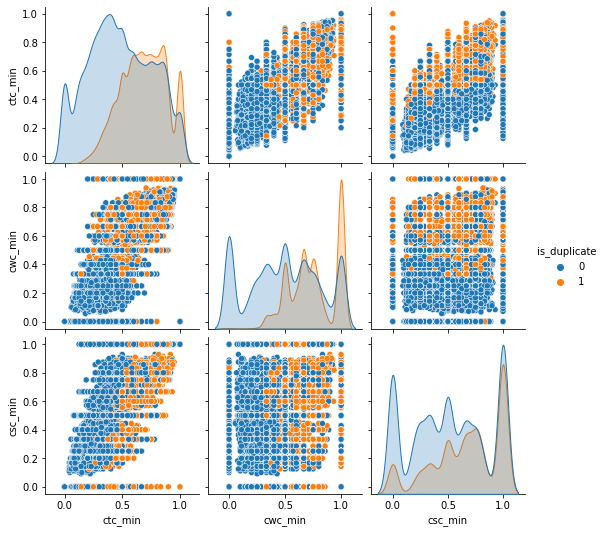

In [47]:
snas.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue='is_duplicate')

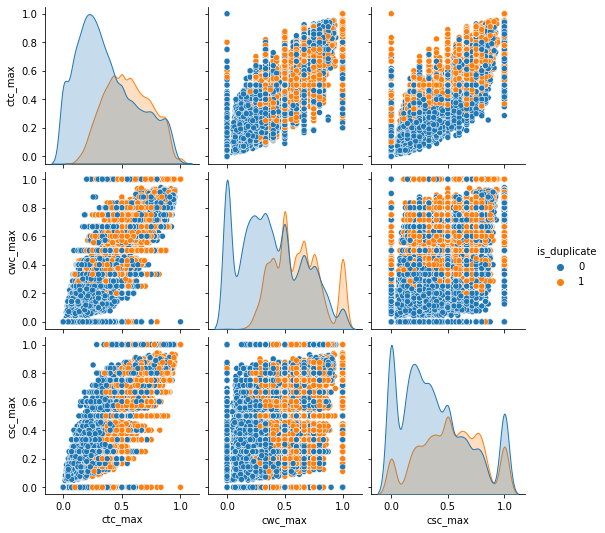

In [48]:
snas.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue='is_duplicate')

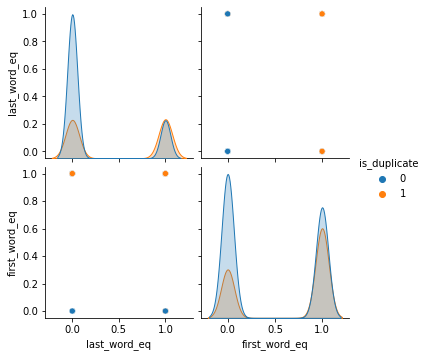

In [49]:
snas.pairplot(df [[ 'last_word_eq', 'first_word_eq', 'is_duplicate']], hue='is_duplicate')

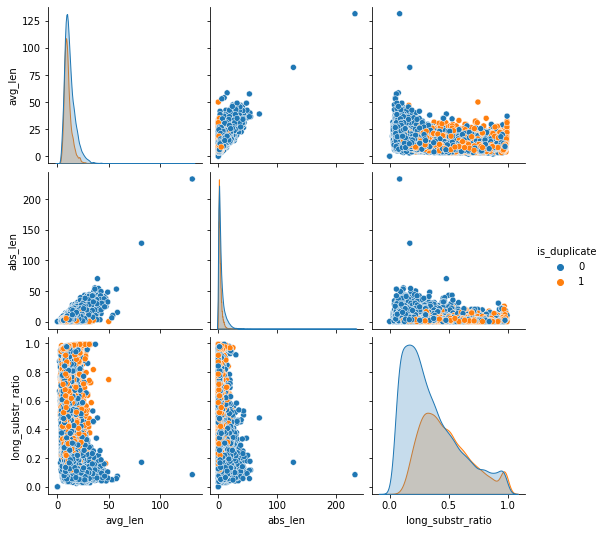

In [50]:
snas.pairplot(df [[ 'avg_len', 'abs_len', 'long_substr_ratio', 'is_duplicate']], hue='is_duplicate')

In [51]:
!pip install fuzzywuzzy

In [52]:
# Fuzzy Features
from fuzzywuzzy import fuzz
def fetch_fuzzy_features (row):
    q1 =row['question1']
    q2 = row['question2']
    fuzzy_features = [0.0]*4
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio (q1, q2)
    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio (q1,q2)
    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, 921)
    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    return fuzzy_features

D:\python\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [53]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [54]:
# min max scalling

In [55]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len' , 'avg_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'long_substr_ratio']])
y = df['is_duplicate'].values

In [56]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.163s...
[t-SNE] Computed neighbors for 40000 samples in 15.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [57]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.202s...
[t-SNE] Computed neighbors for 40000 samples in 15.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [56]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wha...
327711,i am from india and live abroad i met a guy fr...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sout...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [57]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 23)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_sharing,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len,avg_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,0,99
115086,0,47,55,12,15,7,22,0.32,0.666644,0.499988,...,0.466664,1.0,1.0,3.0,13.5,0.229167,69,66,0,74
327711,0,102,118,26,20,3,36,0.08,0.000000,0.000000,...,0.115384,0.0,0.0,6.0,23.0,0.048544,26,30,0,43
367788,0,57,143,13,30,0,32,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.051724,27,46,0,30
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,0,69


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [59]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(40000, 6000)

In [60]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 6023)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_sharing,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,47,55,12,15,7,22,0.32,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,102,118,26,20,3,36,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,57,143,13,30,0,32,0.00,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
accuracy_score(y_test,y_pred)
accuracy_score(y_train,y_pred_train)

0.99990625

In [63]:
accuracy_score(y_test,y_pred)

0.799125

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[4415,  642],
       [ 965, 1978]], dtype=int64)

In [81]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [82]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [83]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features



In [84]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [85]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [86]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))


In [91]:
q1="What is the capital of pakistan?"
q2="where is the current capital of india located?"

In [92]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [93]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))